In [ ]:
!pip install ultralytics

In [10]:
# 버스이미지 로딩
import pandas as pd
from PIL import Image, ImageDraw
import torch

data= result[0].boxes.data
img=Image.open('/content/bus.jpg')
draw=ImageDraw.Draw(img)

In [24]:
result[0].boxes
# 0번에서 박스값을
# 6개의 박스가 출력됨
#data : []안에 값들이 위치값을 의미함
#[4.8739e+01(왼쪽좌표 끝점), 3.9926e+02(오른쪽 좌표 끝점)]

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 5.,  0.,  0.,  0., 11.,  0.])
conf: tensor([0.8705, 0.8690, 0.8536, 0.8193, 0.3461, 0.3013])
data: tensor([[1.7286e+01, 2.3059e+02, 8.0152e+02, 7.6841e+02, 8.7055e-01, 5.0000e+00],
        [4.8739e+01, 3.9926e+02, 2.4450e+02, 9.0250e+02, 8.6898e-01, 0.0000e+00],
        [6.7027e+02, 3.8028e+02, 8.0986e+02, 8.7569e+02, 8.5360e-01, 0.0000e+00],
        [2.2139e+02, 4.0579e+02, 3.4472e+02, 8.5739e+02, 8.1931e-01, 0.0000e+00],
        [6.4347e-02, 2.5464e+02, 3.2288e+01, 3.2504e+02, 3.4607e-01, 1.1000e+01],
        [0.0000e+00, 5.5101e+02, 6.7105e+01, 8.7394e+02, 3.0129e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([6, 6])
xywh: tensor([[409.4020, 499.4990, 784.2324, 537.8136],
        [146.6206, 650.8826, 195.7623, 503.2372],
        [740.0637, 627.9874, 139.5887, 495.4068],
        [283.0555, 631.5919, 123.3235, 451.6003],
        [ 16.1764, 289.8419,  32.2241,  70.3949],
     

In [14]:
classCof = data[:,4] # 정확도의 index값 추출
classCls = data[:,5] # 사람의 0값 index 추출
fbbox=data[(classCls==0) & (classCof>=0.5)] # 사람(0) 이고, 정확도 0.5이상 저장

In [19]:
# 리스트로 저장 , 박스그리기
csvlist=[]
for box in fbbox:
  x,y,w,h,conf,cls = box
  draw.rectangle([x,y,w,h], outline='green',width=4)
  csvlist.append([x.item(),y.item(),w.item(),h.item(),conf.item(),cls.item()])


In [20]:
#csv로 저장
output_csv_path = 'bboxdata.csv'
pd.DataFrame(csvlist, columns=['x','y','w','h','conf','class']).to_csv(output_csv_path, index=False)

In [21]:
# 사진 이미지 .png로 저장
output_img_path = 'image.png'
img.save(output_img_path)

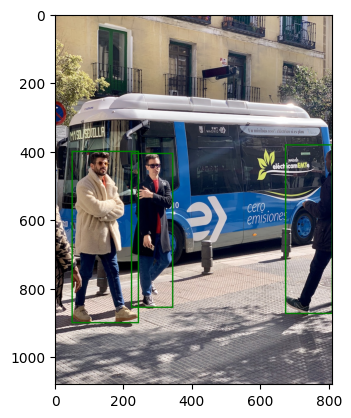

In [22]:
# Pillow로 출력하기
import matplotlib.pyplot as plt
plt.imshow(img)

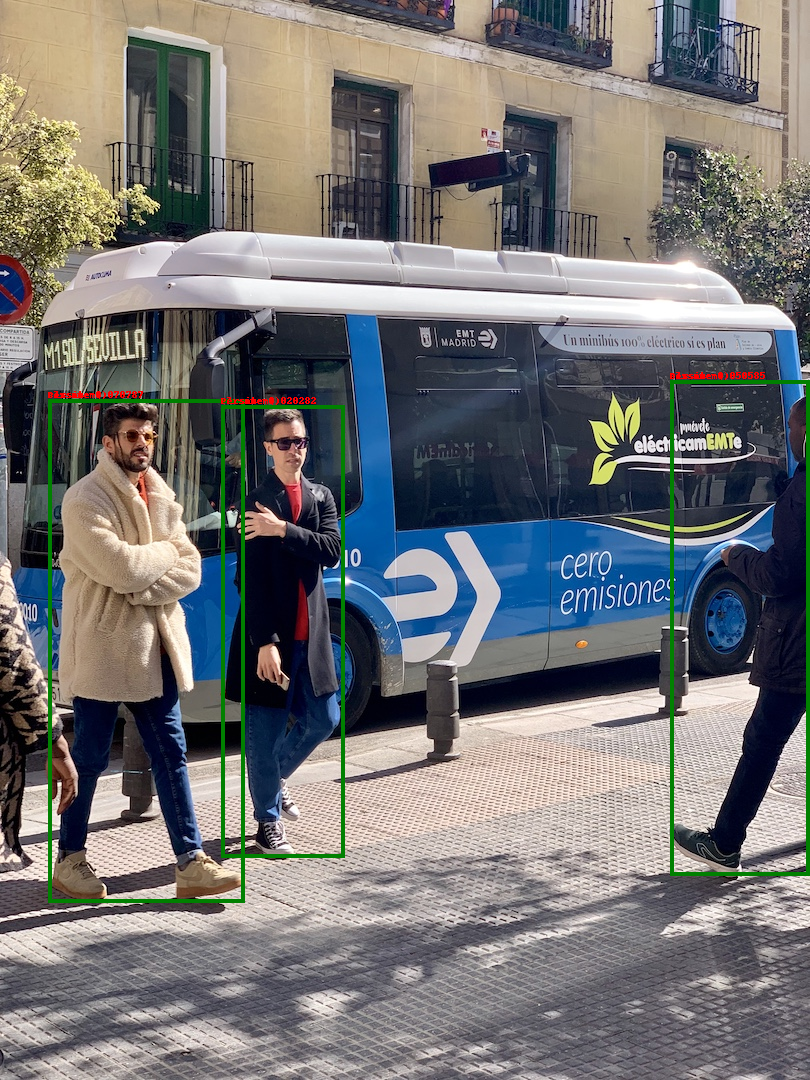

In [38]:
# 텍스트 추가하기

csvlist = []
for box in fbbox:
    x, y, w, h, conf, cls = box
    draw.rectangle([x, y, w, h], outline='green', width=4)

    # 표시할 텍스트를 설정합니다.
    display_text = f"Person: {conf.item():.2f}"
    # 텍스트를 그립니다. 위치를 약간 조정해 텍스트가 상자 위에 오도록 합니다.
    draw.text((x, y - 10), display_text, fill='red')

    csvlist.append([x.item(), y.item(), w.item(), h.item(), conf.item(), cls.item()])

# 변경사항을 확인하기 위해 이미지를 저장하거나 직접 출력할 수 있습니다.
# img.save('/content/annotated_bus.jpg')
img